In [5]:
import pandas as pd
import os
import numpy as np
from sklearn.utils import shuffle

PATH = os.getcwd()
PATH_condition = PATH+"/data/condition"
PATH_control = PATH+"/data/control"

filenames_condition = os.listdir(PATH_condition)
value=[]
y=[]

# n = np.array(pd.read_csv(PATH_condition+"/condition_1.csv",usecols= ['activity']).values,dtype="float")
# print(type(n[0]))

for i in filenames_condition:
    if (".csv" in i):
        n = np.concatenate(pd.read_csv(PATH_condition+"/"+i,usecols= ['activity'],dtype=np.float64,nrows=14400).values).ravel()
        value.append(n)
        y.append(1)
# print(value[0])
# value = np.array(value)
# print(value.shape)

filenames_control = os.listdir(PATH_control)
# value2=[]
for i in filenames_control:
    if (".csv" in i):
        n = np.concatenate(pd.read_csv(PATH_control+"/"+i,usecols= ['activity'],dtype=np.float64,nrows=14400).values).ravel()
        value.append(n)
        y.append(0)


value, y = shuffle(value, y, random_state=42)
y = np.array(y,dtype=np.float64)
res = np.array(value,dtype=np.float64)


In [6]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix


kf = KFold(n_splits=5)
kf.get_n_splits(res)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [7]:
print(len(y))
print(len(res))

55
55


-------------------
score 0.5454545454545454
predict [0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0.]
test [0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.]
AUC =  0.5357142857142857
[[4 2]
 [3 2]]
-------------------
2 2 4 3
sensitivity =  0.4
specificity =  0.6666666666666666
accuracy =  0.5454545454545454
precision =  0.5
fscore =  0.4444444444444445
-------------------
-------------------
score 0.45454545454545453
predict [1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.]
test [1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
AUC =  0.39999999999999997
[[2 2]
 [4 3]]
-------------------
3 2 2 4
sensitivity =  0.42857142857142855
specificity =  0.5
accuracy =  0.45454545454545453
precision =  0.6
fscore =  0.5
-------------------
-------------------
score 0.6363636363636364
predict [0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
test [0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
AUC =  0.5
[[5 3]
 [1 2]]
-------------------
2 3 5 1
sensitivity =  0.6666666666666666
specificity =  0.625
accuracy =  0.6363636363636364
precision =  0.4
fscore =  0.5
------------------

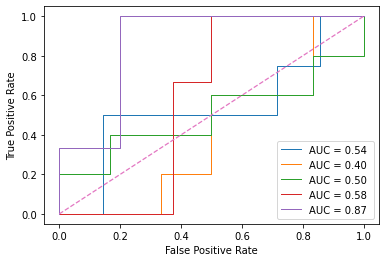

In [8]:
model=LogisticRegression()
fpr_mean = tpr_mean = 0
for train_index, test_index in kf.split(res):
    X_train, X_test = res[train_index], res[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train,y_train)
    sc = model.score(X_test, y_test)
    print("-------------------")
    print("score",sc)
    pr = model.predict(X_test)
    print("predict",pr)
    print("test", y_test)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    plt.plot(fpr,tpr,label="AUC = %0.2f " % auc,  lw=1)
    plt.legend(loc=4)
    print("AUC = ",auc)

    print(confusion_matrix(pr.tolist(), y_test.tolist()))
    print("-------------------")
    tn, fp, fn, tp = confusion_matrix(pr.tolist(), y_test.tolist()).ravel()
    print(tp,fp,tn,fn)
    sensitivity =tp/(tp+fn)
    specificity =tn/(tn+fp)
    accuracy = (tp+tn)/(tp+fp+fn+tn)
    precision = tp/(tp+fp)
    fscore = 2*(sensitivity*precision)/(sensitivity+precision)
    print("sensitivity = ",sensitivity)
    print("specificity = ",specificity)
    print("accuracy = ",accuracy)
    print("precision = ",precision)
    print("fscore = ",fscore)
    print("-------------------")
    
plt.plot(fpr_mean/5,tpr_mean/5,label="Mean AUC = %0.2f " % auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1],  lw=1.25, linestyle="--")
plt.show()